In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import geopandas as gpd
import rasterio as rst
from rasterio.mask import mask

from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

import warnings
warnings.filterwarnings("ignore")

In [2]:
def month_season_detector(df):

    df['data'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

    df['month'] = df['data'].dt.month

    df.loc[df['month']==1,'mes'] = 'Jan'
    df.loc[df['month']==2,'mes'] = 'Feb'
    df.loc[df['month']==3,'mes'] = 'Mar'
    df.loc[df['month']==4,'mes'] = 'Apr'
    df.loc[df['month']==5,'mes'] = 'May'
    df.loc[df['month']==6,'mes'] = 'Jun'
    df.loc[df['month']==7,'mes'] = 'Jul'
    df.loc[df['month']==8,'mes'] = 'Aug'
    df.loc[df['month']==9,'mes'] = 'Sep'
    df.loc[df['month']==10,'mes'] = 'Oct'
    df.loc[df['month']==11,'mes'] = 'Nov'
    df.loc[df['month']==12,'mes'] = 'Dec'

    df.loc[df['month']==1,'season'] = 'wet'
    df.loc[df['month']==2,'season'] = 'wet'
    df.loc[df['month']==3,'season'] = 'wet'
    df.loc[df['month']==4,'season'] = 'wet'
    df.loc[df['month']==5,'season'] = 'dry'
    df.loc[df['month']==6,'season'] = 'dry'
    df.loc[df['month']==7,'season'] = 'dry'
    df.loc[df['month']==8,'season'] = 'dry'
    df.loc[df['month']==9,'season'] = 'dry'
    df.loc[df['month']==10,'season'] = 'wet'
    df.loc[df['month']==11,'season'] = 'wet'
    df.loc[df['month']==12,'season'] = 'wet'

In [12]:
entropy_f = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/florestal_entropy_reindex.csv')
entropy_s = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/savanica_entropy_reindex.csv')
entropy_c = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/campestre_entropy_reindex.csv')

alpha_f = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/florestal_alpha_angle_reindex.csv')
alpha_s = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/savanica_alpha_angle_reindex.csv')
alpha_c = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/campestre_alpha_angle_reindex.csv')

dop_f = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/florestal_DOP.csv')
dop_s = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/savanica_DOP.csv')
dop_c = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/campestre_DOP.csv')

beta_f = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/florestal_Beta.csv')
beta_s = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/savanica_Beta.csv')
beta_c = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/campestre_Beta.csv')

In [13]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

pink_patch = dict(facecolor='pink', color='k')
blue_patch = dict(facecolor='lightblue', color='k')
green_patch = dict(facecolor='lightgreen', color='k')
orange_patch = dict(facecolor='orange', color='k')
yellow_patch = dict(facecolor='yellow', color='k')

median_patch = dict(color='red')

In [14]:
rain = pd.read_csv('D:/thesis_data/pluviometric_data/pluviometric_data_PNB_paper_01.csv', sep=',')

In [15]:
month_season_detector(entropy_f)
month_season_detector(entropy_s)
month_season_detector(entropy_c)
month_season_detector(alpha_f)
month_season_detector(alpha_s)
month_season_detector(alpha_c)

month_season_detector(dop_f)
month_season_detector(dop_s)
month_season_detector(dop_c)

month_season_detector(beta_f)
month_season_detector(beta_s)
month_season_detector(beta_c)

month_season_detector(rain)

In [16]:
entropy_f_dict = {'wet': entropy_f.loc[entropy_f['season']=='wet']['mean'].values, 'dry': entropy_f.loc[entropy_f['season']=='dry']['mean'].values}
entropy_s_dict = {'wet': entropy_s.loc[entropy_s['season']=='wet']['mean'].values, 'dry': entropy_s.loc[entropy_s['season']=='dry']['mean'].values}
entropy_c_dict = {'wet': entropy_c.loc[entropy_c['season']=='wet']['mean'].values, 'dry': entropy_c.loc[entropy_c['season']=='dry']['mean'].values}

alpha_f_dict = {'wet': alpha_f.loc[alpha_f['season']=='wet']['mean'].values, 'dry': alpha_f.loc[alpha_f['season']=='dry']['mean'].values}
alpha_s_dict = {'wet': alpha_s.loc[alpha_s['season']=='wet']['mean'].values, 'dry': alpha_s.loc[alpha_s['season']=='dry']['mean'].values}
alpha_c_dict = {'wet': alpha_c.loc[alpha_c['season']=='wet']['mean'].values, 'dry': alpha_c.loc[alpha_c['season']=='dry']['mean'].values}

dop_f_dict = {'wet': dop_f.loc[dop_f['season']=='wet']['mean'].values, 'dry': dop_f.loc[dop_f['season']=='dry']['mean'].values}
dop_s_dict = {'wet': dop_s.loc[dop_s['season']=='wet']['mean'].values, 'dry': dop_s.loc[dop_s['season']=='dry']['mean'].values}
dop_c_dict = {'wet': dop_c.loc[dop_c['season']=='wet']['mean'].values, 'dry': dop_c.loc[dop_c['season']=='dry']['mean'].values}

beta_f_dict = {'wet': beta_f.loc[beta_f['season']=='wet']['mean'].values, 'dry': beta_f.loc[beta_f['season']=='dry']['mean'].values}
beta_s_dict = {'wet': beta_s.loc[beta_s['season']=='wet']['mean'].values, 'dry': beta_s.loc[beta_s['season']=='dry']['mean'].values}
beta_c_dict = {'wet': beta_c.loc[beta_c['season']=='wet']['mean'].values, 'dry': beta_c.loc[beta_c['season']=='dry']['mean'].values}

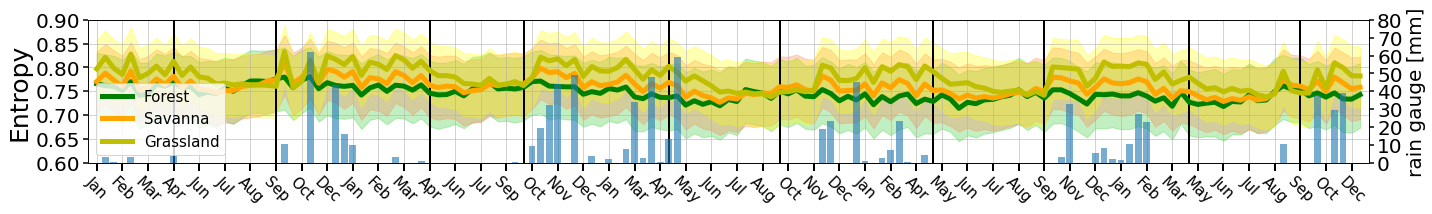

In [29]:
label_size = 20

fig, ax = plt.subplots(figsize=(20,3))

ax.vlines(entropy_f.index[9], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(entropy_f.index[21], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(entropy_f.index[39], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(entropy_f.index[50], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(entropy_f.index[67], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(entropy_f.index[80], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(entropy_f.index[98], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(entropy_f.index[111], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(entropy_f.index[128], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(entropy_f.index[141], ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(entropy_f.index, entropy_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(entropy_f.index, entropy_f['percentile_25'], entropy_f['percentile_75'], alpha=0.3, color='limegreen')

ax.plot(entropy_s.index, entropy_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(entropy_s.index, entropy_s['percentile_25'], entropy_s['percentile_75'], alpha=0.3, color='coral')

ax.plot(entropy_c.index, entropy_c['median'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(entropy_c.index, entropy_c['percentile_25'], entropy_c['percentile_75'], alpha=0.3, color='yellow')

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax.set_xticks(ticks=entropy_f.index)
ax.set_xticklabels(labels=entropy_f['mes'], fontdict={'fontsize': 15, 'rotation': -45})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([0.6, 0.9])
ax.set_xlim([-1, 149])
ax.set_ylabel('Entropy', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=8)
ax.legend(fontsize=15, loc='lower left')
ax.grid(True, alpha=0.7)

sec_0 = ax.twinx()
sec_0.bar(rain['date'], rain['gauge_mm'], alpha=0.6)
sec_0.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
sec_0.locator_params(axis='y', nbins=12)
sec_0.set_ylim([0, 80])
sec_0.set_ylabel('rain gauge [mm]', fontsize=20)

#sec_0.set_yticks(np.linspace(sec_0.get_yticks()[0], sec_0.get_yticks()[-1], len(ax.get_yticks())))

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/entropy_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

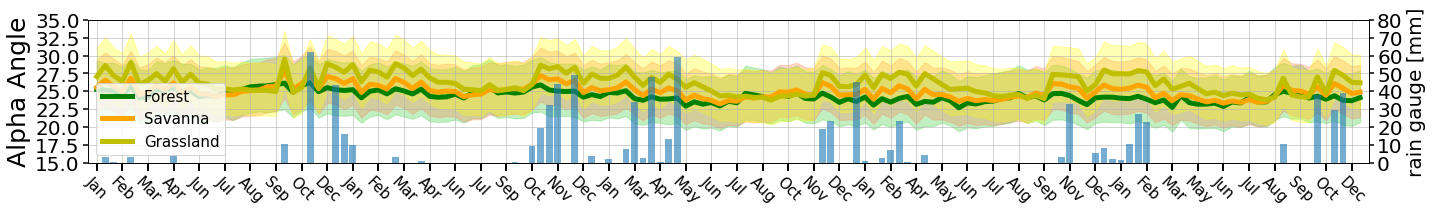

In [28]:
label_size = 20

x = alpha_f.index

fig, ax = plt.subplots(figsize=(20,3))

ax.vlines(x[9], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[21], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[39], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[50], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[67], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[80], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[98], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[111], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[128], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax.vlines(x[141], ymin=0, ymax=1.5, colors='k', linewidth=2)

ax.plot(x, alpha_f['median'], 'green', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Forest')
ax.fill_between(x, alpha_f['percentile_25'], alpha_f['percentile_75'], alpha=0.3, color='limegreen')

ax.plot(x, alpha_s['median'], 'orange', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Savanna')
ax.fill_between(x, alpha_s['percentile_25'], alpha_s['percentile_75'], alpha=0.3, color='coral')

ax.plot(x, alpha_c['median'], 'y', markersize=9, markeredgewidth=0.5, markeredgecolor='k', linewidth=5, label='Grassland')
ax.fill_between(x, alpha_c['percentile_25'], alpha_c['percentile_75'], alpha=0.3, color='yellow')

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax.set_xticks(ticks=x)
ax.set_xticklabels(labels=entropy_f['mes'], fontdict={'fontsize': 15, 'rotation': -45})
ax.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
ax.set_ylim([15, 35])
ax.set_xlim([-1, 149])
ax.set_ylabel('Alpha Angle', fontsize=25)
ax.locator_params(axis='x', nbins=60)
ax.locator_params(axis='y', nbins=8)
ax.legend(fontsize=15, loc='lower left')
ax.grid(True, alpha=0.7)

sec_0 = ax.twinx()
sec_0.bar(rain['date'], rain['gauge_mm'], alpha=0.6)
sec_0.tick_params(axis='y', length=5, width=1.5, labelsize=label_size)
sec_0.locator_params(axis='y', nbins=12)
sec_0.set_ylim([0, 80])
sec_0.set_ylabel('rain gauge [mm]', fontsize=20)

sec_0.set_yticks(np.linspace(sec_0.get_yticks()[0], sec_0.get_yticks()[-1], len(ax.get_yticks())))

plt.tight_layout()

plt.savefig('C:/Users/jales/Desktop/alpha_profiles.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

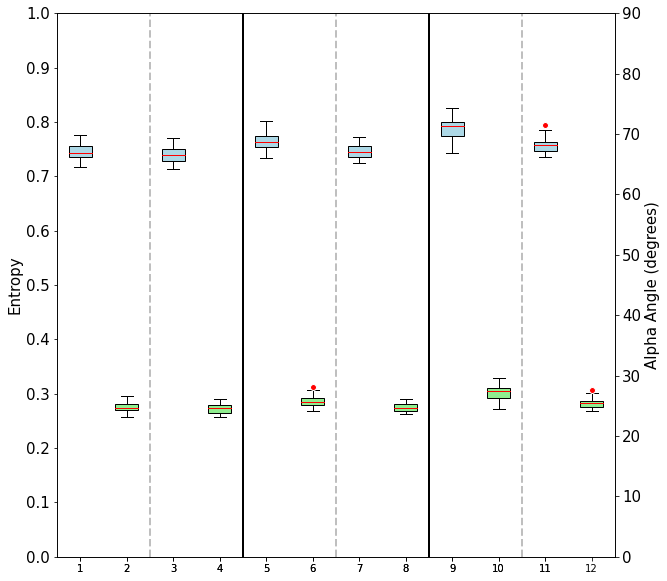

In [41]:
fig, ax = plt.subplots(figsize=(10,10))

ax.vlines(2.5, ymin=0, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(4.5, ymin=0, ymax=1, colors='k', linewidth=2)
ax.vlines(6.5, ymin=0, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(8.5, ymin=0, ymax=1, colors='k', linewidth=2)
ax.vlines(10.5, ymin=0, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)

ax.boxplot([entropy_f_dict['wet'], [np.nan], entropy_f_dict['dry'], [np.nan], entropy_s_dict['wet'], [np.nan], entropy_s_dict['dry'], [np.nan], entropy_c_dict['wet'], [np.nan], entropy_c_dict['dry']], patch_artist=True, flierprops=red_circle, boxprops=blue_patch, medianprops=median_patch)
ax.set_ylim([0, 1])
ax.locator_params(axis='y', nbins=15)
ax.set_ylabel('Entropy', fontsize=15)
ax.tick_params(axis='y', labelsize=15)

sec_0 = ax.twinx()
sec_0.boxplot([[np.nan], alpha_f_dict['wet'], [np.nan], alpha_f_dict['dry'], [np.nan], alpha_s_dict['wet'], [np.nan], alpha_s_dict['dry'], [np.nan], alpha_c_dict['wet'], [np.nan], alpha_c_dict['dry']], patch_artist=True, flierprops=red_circle, boxprops=green_patch, medianprops=median_patch)
sec_0.set_ylim([0, 90])
sec_0.set_ylabel('Alpha Angle (degrees)', fontsize=15)
sec_0.tick_params(axis='y', labelsize=15)
sec_0.locator_params(axis='y', nbins=15)

#plt.savefig('C:/Users/jales/Desktop/pol_decomp_boxplots.svg', dpi=None, facecolor='w', edgecolor='w', orientation='landscape', format='svg', transparent=False)


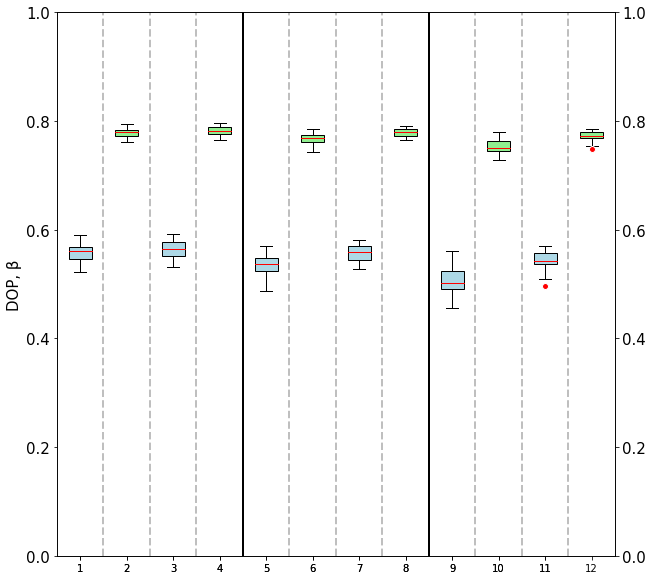

In [37]:
fig, ax = plt.subplots(figsize=(10,10))

ax.vlines(1.5, ymin=0, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(2.5, ymin=0, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(3.5, ymin=0, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(4.5, ymin=0, ymax=1, colors='k', linewidth=2)
ax.vlines(5.5, ymin=0, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(6.5, ymin=0, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(7.5, ymin=0, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(8.5, ymin=0, ymax=1, colors='k', linewidth=2)
ax.vlines(9.5, ymin=0, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(10.5, ymin=0, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(11.5, ymin=0, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)

ax.boxplot([dop_f_dict['wet'], [np.nan], dop_f_dict['dry'], [np.nan], dop_s_dict['wet'], [np.nan], dop_s_dict['dry'], [np.nan], dop_c_dict['wet'], [np.nan], dop_c_dict['dry']], patch_artist=True, flierprops=red_circle, boxprops=blue_patch, medianprops=median_patch)
ax.set_ylim([0, 1])
ax.locator_params(axis='y', nbins=12)
ax.set_ylabel('DOP, β', fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.locator_params(axis='y', nbins=8)

sec_0 = ax.twinx()
sec_0.boxplot([[np.nan], beta_f_dict['wet'], [np.nan], beta_f_dict['dry'], [np.nan], beta_s_dict['wet'], [np.nan], beta_s_dict['dry'], [np.nan], beta_c_dict['wet'], [np.nan], beta_c_dict['dry']], patch_artist=True, flierprops=red_circle, boxprops=green_patch, medianprops=median_patch)
sec_0.set_ylim([0, 1])
sec_0.tick_params(axis='y', labelsize=15)
sec_0.locator_params(axis='y', nbins=15)
sec_0.locator_params(axis='y', nbins=8)

#plt.savefig('C:/Users/jales/Desktop/dop_beta_boxplots.svg', dpi=None, facecolor='w', edgecolor='w', orientation='landscape', format='svg', transparent=False)

In [34]:
roi_geom = gpd.read_file('D:/thesis_data/ROI/classes/form_florestal_30m_32723.geojson')

slc_samples_path = 'D:/thesis_data/POL_DECOMP/rasters/'

with rst.open(slc_samples_path + 'S1_split_Orb_Cal_Deb_Sub_Mul_C2_Spk_Decomp_TC_20190619T084506_32723.tif') as raster_slc:
    image_slc, transform_slc = mask(raster_slc, [roi_geom], crop=True, nodata=np.nan)

    entropy = image_slc[0]
    anisotropy = image_slc[1]
    alpha_angle = image_slc[2]

RasterioIOError: D:/thesis_data/POL_DECOMP/rasters/S1_split_Orb_Cal_Deb_Sub_Mul_C2_Spk_Decomp_TC_20190619T084506_32723.tif: No such file or directory

In [ ]:
df = pd.DataFrame({'entropy': entropy.flatten(), 'alpha_angle': alpha_angle.flatten()})
df.dropna(inplace=True)

def calc_h_alpha(C2):
    assert isinstance(C2, np.ndarray)
    assert C2.ndim >= 2
    assert C2.shape[-2:] == (2, 2)

    EPS = 1e-30
    eig_values, eig_vectors = np.linalg.eigh(C2)
    eig_values[eig_values < EPS] = EPS

    probs = eig_values / np.sum(eig_values, axis=-1, keepdims=True)

    h = -np.sum(probs * (np.log(probs) / np.log(2)), axis=-1)

    alpha = np.sum(probs * np.arccos(np.abs(eig_vectors[..., 0, :])), axis=-1)
    return h, np.degrees(alpha)


def curve1_C2(m):
    assert 0.0 <= m <= 1.0
    return np.array(
        [
            [1, 0],
            [0, m],
        ]
    )

def curve2_C2(m):
    assert 0.0 <= m <= 1.0
    return (
        np.array(
            [
                [m, 0],
                [0, 1],
            ]
        )      
    )

In [ ]:
x = df.entropy
y = df.alpha_angle

data , x_e, y_e = np.histogram2d(x, y, bins = [150,150], density=True)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data, np.vstack([x,y]).T, method = "splinef2d", bounds_error = False)

#To be sure to plot all data
z[np.where(np.isnan(z))] = 0.0

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

curve_style = {

    "color": "b",
    "linewidth": 2
}

ax.plot(*calc_h_alpha(np.array([curve1_C2(m) for m in np.linspace(0, 1, 100)])), **curve_style)
ax.plot(*calc_h_alpha(np.array([curve2_C2(m) for m in np.linspace(0, 1, 100)])), **curve_style)

bounds = [
([0, 0.69], [26.1, 26.1]),
([0, 0.69], [49.1, 49.1]),
([0.69, 0.69], [0.0, 90.0]),
([0.69, 0.94], [37.8, 37.8]),
([0.69, 0.94], [53.0, 53.0]),
([0.94, 0.94], [0.0, 90.0]),
([0.94, 1.0], [32.0, 32.0]),
([0.94, 1.0], [53.8, 53.8]),
]

for xs, ys in bounds:
    ax.plot(xs, ys, "--", color="gray")

ax.scatter(x, y, c=z, s=1, cmap='Spectral')

ax.set_xlim(0, 1)
ax.set_ylim(0, 90)
ax.set_xlabel("Entropy", fontsize=25)
ax.set_ylabel("Alpha Angle [degrees]", fontsize=25)
ax.tick_params(top="on", right="on", direction="in")
ax.tick_params(axis='y', length=5, width=1.5, labelsize=22)
ax.tick_params(axis='x', length=5, width=1.5, labelsize=22)

# Zones
ax.text(0.32, 70, 'Z3', fontsize=25)
ax.text(0.32, 37, 'Z2', fontsize=25)
ax.text(0.32, 12, 'Z1', fontsize=25)

ax.text(0.8, 58, 'Z6', fontsize=25)
ax.text(0.8, 45, 'Z5', fontsize=25)
ax.text(0.8, 30, 'Z4', fontsize=25)

ax.text(0.95, 56, 'Z9', fontsize=25)
ax.text(0.95, 45, 'Z8', fontsize=25)
ax.text(0.95, 15, 'Z7', fontsize=25)

# Colorbar
norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap='Spectral'), ax=ax)
cbar.ax.set_ylabel('Density', fontsize=25)
cbar.ax.tick_params(labelsize=22)

#plt.savefig('C:/Users/jales/Desktop/campestre_h_alpha_2019_06_19_test.png', dpi=300, facecolor='w', edgecolor='w', orientation='landscape', format='png', transparent=False)